# $45^\circ$ Correction Investigation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

Apparatus Measurements and Fundamental Constants

In [33]:
# Speed of light
c = 299792458

# Sample thickness
d=0.0127

#### Apply Simulation Investigation Corrections to 25A Ferrite
The big caveat is that we are now subtracting the 45 degree phase rather than adding it

07032023_Ferrite_Meas_Current/NO_SAMPLE_0A.S2P


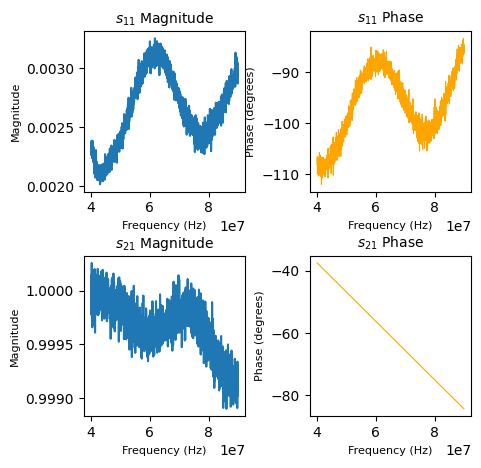

07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P


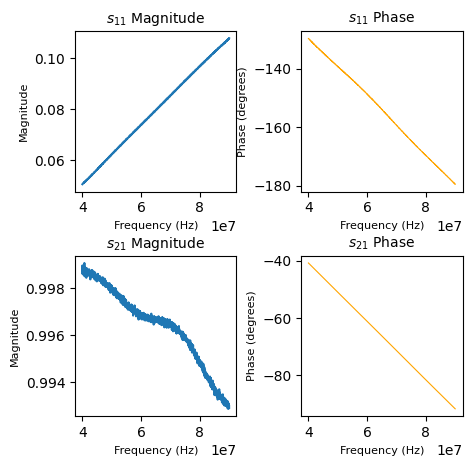

07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P with All Corrections


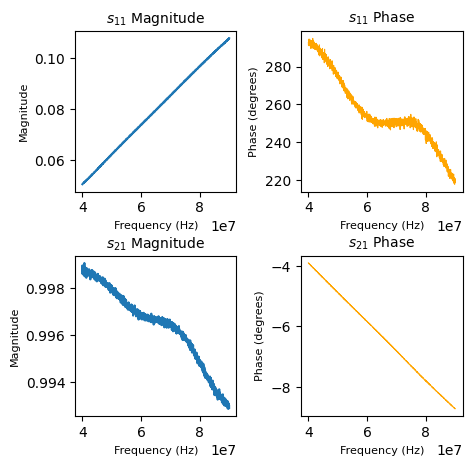

Relative permittivity:  (10.84917748758337-0.6308075930197533j)
Relative permeability:  (2.064453954561528+0.5111287140558433j)


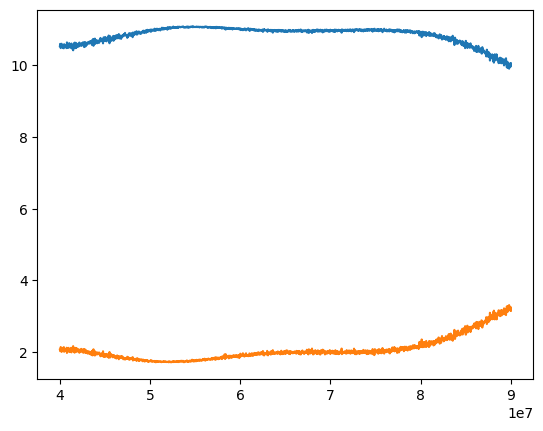

In [40]:
frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(r'07032023_Ferrite_Meas_Current/NO_SAMPLE_0A.S2P', True)
#frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_DEEMBED.S2P', True)
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P', True)

# Subtract 360 from the values that meet the condition
s11_phase[s11_phase > 0] -= 360
s11_phase = s11_phase - s11_phase_h
s21_phase = s21_phase - s21_phase_h

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0
s11_phase = s11_phase - phi_0

# 45 degree correction
s11_phase  = s11_phase - 45 + 360

# Plot the data with the air sample phase correction added
s2p.plot_parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P with All Corrections', frequency, s11_mag, s11_phase, s21_mag, s21_phase)

s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

# Calculate epsilon and mu
K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)
lambda_0 = c / frequency
A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)

plt.plot(frequency, np.real(epsilon_r))
plt.plot(frequency, np.real(mu_r))
print('Relative permittivity: ', np.average(epsilon_r))
print('Relative permeability: ', np.average(mu_r))